      product    category    retailer    geo  price  sales  discount  \
0   Product_7  Category_2  Retailer_5  Geo_4  18.55     21      0.17   
1  Product_20  Category_3  Retailer_5  Geo_5  27.62     21      0.13   
2  Product_15  Category_2  Retailer_8  Geo_4   7.53     16      0.10   
3  Product_11  Category_3  Retailer_6  Geo_5  27.10     17      0.22   
4   Product_8  Category_1  Retailer_8  Geo_1  46.72     19      0.27   

   loyalty_program  customer_retention  revenue  
0                0                   0   604.22  
1                0                   0   329.50  
2                1                   0   336.30  
3                0                   0   135.33  
4                0                   0   374.90  
             price        sales     discount  loyalty_program  \
count  1000.000000  1000.000000  1000.000000       1000.00000   
mean     27.094330    19.832000     0.146670          0.27600   
std      12.936961     4.477032     0.085516          0.44724   
min    

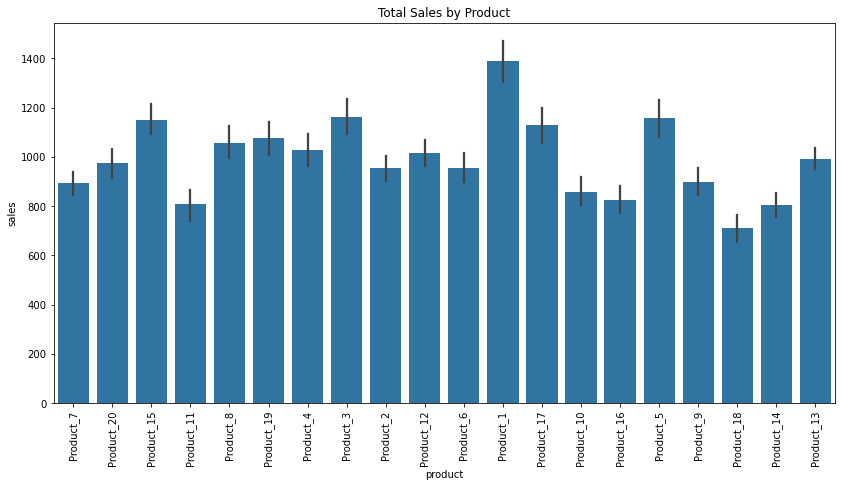

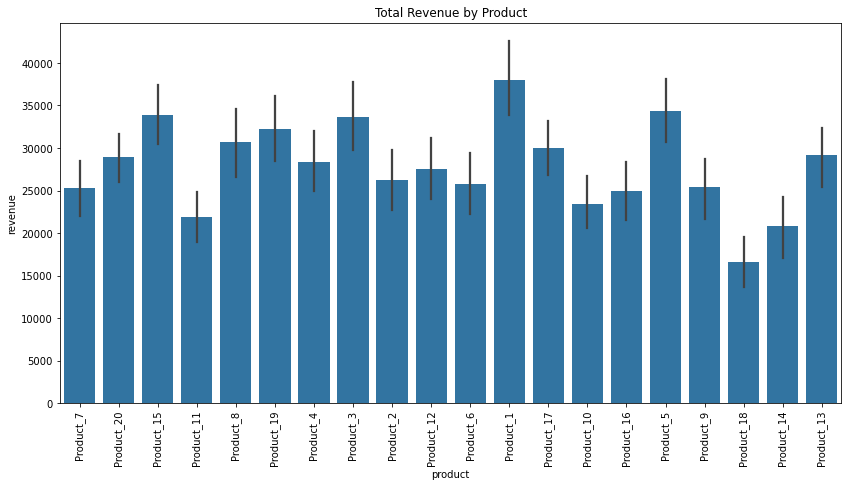

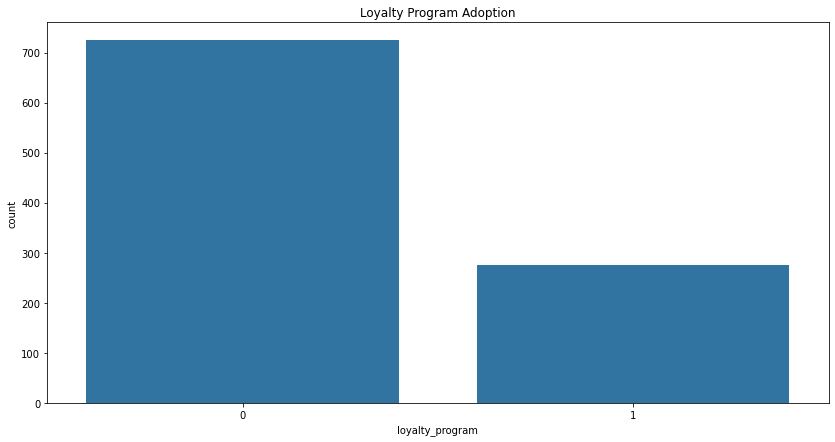

Mean Squared Error: 93660.81286650168
R2 Score: -0.2509894781278985


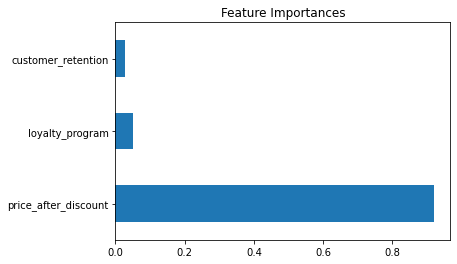

Current Price: 12.18
Optimized Price: 13.398000000000001
Predicted Revenue: 380.34090000000003


/home/gabriel/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Generating Synthetic Data
# General settings
np.random.seed(42)
num_records = 1000

# Generate data for prices and sales
products = ['Product_' + str(i) for i in range(1, 21)]
categories = ['Category_' + str(i) for i in range(1, 6)]
retailers = ['Retailer_' + str(i) for i in range(1, 11)]
geos = ['Geo_' + str(i) for i in range(1, 6)]

data = {
    'product': np.random.choice(products, num_records),
    'category': np.random.choice(categories, num_records),
    'retailer': np.random.choice(retailers, num_records),
    'geo': np.random.choice(geos, num_records),
    'price': np.random.uniform(5, 50, num_records).round(2),
    'sales': np.random.poisson(lam=20, size=num_records),
    'discount': np.random.uniform(0, 0.3, num_records).round(2),
    'loyalty_program': np.random.choice([0, 1], num_records, p=[0.7, 0.3]),
    'customer_retention': np.random.choice([0, 1], num_records, p=[0.8, 0.2]),
    'revenue': np.random.uniform(100, 1000, num_records).round(2)
}

df = pd.DataFrame(data)

# Visualizing the generated data
print(df.head())

# Step 2: Exploratory Data Analysis (EDA)

# Descriptive analysis
print(df.describe())

# Visualizing total sales by product
plt.figure(figsize=(14, 7))
sns.barplot(x='product', y='sales', data=df, estimator=sum)
plt.title('Total Sales by Product')
plt.xticks(rotation=90)
plt.show()

# Visualizing total revenue by product
plt.figure(figsize=(14, 7))
sns.barplot(x='product', y='revenue', data=df, estimator=sum)
plt.title('Total Revenue by Product')
plt.xticks(rotation=90)
plt.show()

# Visualizing loyalty program adoption
plt.figure(figsize=(14, 7))
sns.countplot(x='loyalty_program', data=df)
plt.title('Loyalty Program Adoption')
plt.show()

# Step 3: Price Optimization Modeling

# Prepare the data
df['price_after_discount'] = df['price'] * (1 - df['discount'])
X = df[['price_after_discount', 'loyalty_program', 'customer_retention']]
y = df['revenue']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

# Visualizing feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.plot(kind='barh')
plt.title('Feature Importances')
plt.show()

# Step 4: Price Optimization Simulation

# Function to optimize price
def optimize_price(model, current_price, loyalty_program, retention_rate):
    optimized_price = current_price * (1 + 0.1)  # Increase price by 10% as an example
    prediction = model.predict([[optimized_price, loyalty_program, retention_rate]])
    return optimized_price, prediction[0]

# Example of price optimization for a product
product_idx = 10  # Index of the product to be optimized
current_price = df.iloc[product_idx]['price']
loyalty_program = df.iloc[product_idx]['loyalty_program']
retention_rate = df.iloc[product_idx]['customer_retention']

optimized_price, predicted_revenue = optimize_price(model, current_price, loyalty_program, retention_rate)
print(f'Current Price: {current_price}')
print(f'Optimized Price: {optimized_price}')
print(f'Predicted Revenue: {predicted_revenue}')
